# Predicción del Tiempo Real de Mantenimiento en el área de fibra

## 1. Definición del Problema

El objetivo de este proyecto es desarrollar un modelo de machine learning que prediga con precisión el tiempo real de mantenimiento (en horas) de los equipos críticos en el área de fibra de una planta de celulosa Kraft. Buscamos alcanzar una precisión superior al 80% (medida por el R² Score) en nuestras predicciones, utilizando datos históricos de mantenimiento y operación de los equipos.

## 2. Recopilación y Preparación de Datos

Los datos utilizados en este proyecto provienen de un dataset generado que contiene información sobre los equipos, fallas identificadas, causas raíz, y tiempos de mantenimiento estimados y reales. A continuación, se realizarán los pasos de preprocesamiento para preparar los datos para el modelado.

### 2.1 Carga de Datos

In [22]:
import pandas as pd

# Cargar los datos desde un archivo CSV
df = pd.read_csv('Datos_de_Mantenimiento_Predictivo_Fibra.csv')

# Visualizar los primeros registros para entender la estructura de los datos
df.head()

,Equipo,Fecha de Inicio de Mantenimiento,Fecha de Término de Mantenimiento,Falla Identificada,Descripción de la Falla,Causa Raíz,Tiempo Estimado de Mantenimiento (hrs),Tiempo Real de Mantenimiento (hrs)
0,Prensas,2024-02-05,2024-02-07 23:00:00,Fuga en rodillo inferior,Fuga de líquido en el rodillo inferior,Sobrecarga,72,71
1,Tamices o Cribas,2024-03-06,2024-03-06 08:00:00,Mallas desgastadas,Desgaste de mallas que compromete la eficienci...,Corrosión,8,8
2,Prensas,2024-04-10,2024-04-10 10:00:00,Baja presión en salida,Presión insuficiente detectada en la salida,Fatiga del material,8,10
3,Lavadoras de Pulpa,2024-05-25,2024-05-25 11:00:00,Rodillos desgastados,Rodillos muestran desgaste que afecta el rendi...,Falla mecánica,12,11
4,Refinadores,2024-07-14,2024-07-14 05:00:00,Desgaste significativo,Desgaste avanzado en cuchillas que afecta la c...,Fatiga del material,4,5


### 2.2 Preprocesamiento de Datos

El preprocesamiento incluirá la codificación de variables categóricas, manejo de valores nulos, y normalización de las variables numéricas.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Seleccionar características y objetivo
X = df[['Equipo', 'Falla Identificada', 'Descripción de la Falla', 'Causa Raíz', 'Tiempo Estimado de Mantenimiento (hrs)']]
y = df['Tiempo Real de Mantenimiento (hrs)']

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline para preprocesamiento y modelado
categorical_features = ['Equipo', 'Falla Identificada', 'Descripción de la Falla', 'Causa Raíz']
numeric_features = ['Tiempo Estimado de Mantenimiento (hrs)']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', SimpleImputer(strategy='mean'), numeric_features)
    ])

### 2.3 Identificación Visual de Outliers

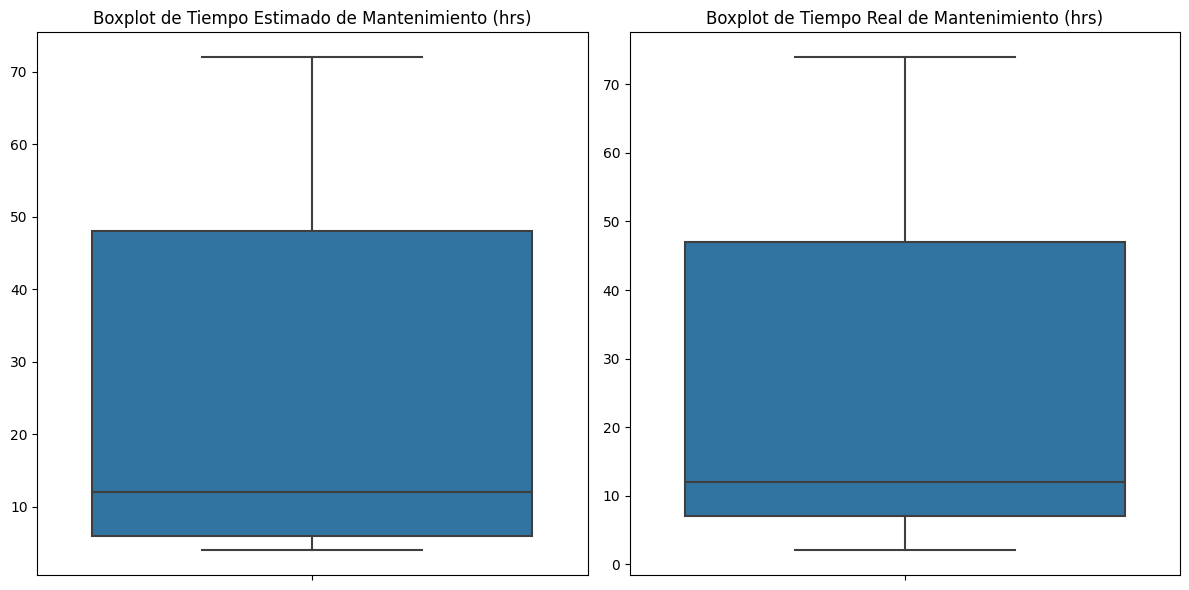

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar columnas numéricas para visualizar outliers
numeric_columns = ['Tiempo Estimado de Mantenimiento (hrs)', 'Tiempo Real de Mantenimiento (hrs)']

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear boxplots para cada columna numérica
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [31]:
import plotly.express as px

# Crear un boxplot interactivo para visualizar el Tiempo de Mantenimiento según el equipo
fig = px.box(df, x='Equipo', y='Tiempo Real de Mantenimiento (hrs)', points='all', title='Boxplot de Tiempo Real de Mantenimiento por Equipo')
fig.show()

## 3. Desarrollo del Modelo Predictivo

Probaremos diferentes modelos de machine learning para encontrar el que mejor se ajuste a los datos. En este ejemplo, utilizaremos un modelo Random Forest Regressor, que es adecuado para capturar relaciones no lineales y es robusto frente a outliers.

### 3.1 Entrenamiento del Modelo

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Crear el pipeline con el modelo Random Forest
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', RandomForestRegressor(random_state=42))])

# Entrenar el modelo
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Equipo',
                                                   'Falla Identificada',
                                                   'Descripción de la Falla',
                                                   'Causa Raíz']),
                                                 ('num', SimpleImputer(),
                                                  ['Tiempo Estimado de '
                                                   'Mantenimiento (hrs)'])])),
                ('model', RandomForestRegressor(random_state=42))])

## 4. Evaluación del Modelo

Evaluaremos el rendimiento del modelo utilizando el conjunto de prueba. Las métricas de evaluación incluirán el Mean Absolute Error (MAE) y el R² Score para los modelos Random Forest y Regresión Lineal.

In [25]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predecir los tiempos reales de mantenimiento en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'R2 Score: {r2}')

MAE: 1.3704683519952265
R2 Score: 0.9949429243713761


In [26]:
from sklearn.linear_model import LinearRegression

# Crear y entrenar el modelo de Regresión Lineal
linear_model = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', LinearRegression())])
linear_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred_linear = linear_model.predict(X_test)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'MAE LR: {mae_linear}')
print(f'R2 Score LR: {r2_linear}')

MAE LR: 1.2029760129575076
R2 Score LR: 0.9962608922263962


### **Conclusiones del Análisis Comparativo**

Después de evaluar los modelos Random Forest y Regresión Lineal para predecir el tiempo real de mantenimiento, aquí están las conclusiones:

1. **Random Forest Regressor:**
   - **MAE (Error Absoluto Medio):** 1.37 horas
   - **R² Score:** 0.9949

   El modelo Random Forest muestra un excelente rendimiento, con un R² Score de 0.9949, lo que indica que el modelo es capaz de explicar el 99.49% de la variabilidad en los tiempos reales de mantenimiento. El MAE de 1.37 horas sugiere que, en promedio, el modelo predice el tiempo de mantenimiento con un error de aproximadamente 1.37 horas.

2. **Regresión Lineal:**
   - **MAE (Error Absoluto Medio):** 1.20 horas
   - **R² Score:** 0.9963

   El modelo de Regresión Lineal supera ligeramente al modelo Random Forest en términos de precisión, con un R² Score de 0.9963, lo que indica que el modelo es capaz de explicar el 99.63% de la variabilidad en los tiempos reales de mantenimiento. El MAE de 1.20 horas sugiere que, en promedio, el modelo predice el tiempo de mantenimiento con un error de aproximadamente 1.20 horas, lo que es mejor que el modelo Random Forest.

### **Conclusión General:**
A pesar de que el Random Forest es un modelo más complejo y generalmente más robusto en situaciones con relaciones no lineales y datos ruidosos, en este caso, el modelo de Regresión Lineal simple ha demostrado ser más preciso para predecir el tiempo real de mantenimiento.

Esto podría sugerir que la relación entre las variables predictoras y el tiempo de mantenimiento es predominantemente lineal, o que el conjunto de datos tiene suficiente estructura lineal para que la Regresión Lineal capture las relaciones principales de manera efectiva. Además, la Regresión Lineal tiene la ventaja de ser más interpretable y menos computacionalmente costosa.

Dado estos resultados, el modelo de Regresión Lineal sería la opción preferida en este caso, especialmente si la interpretabilidad y la simplicidad del modelo son prioridades. Sin embargo, es importante seguir probando con diferentes conjuntos de datos y en diferentes escenarios para confirmar estas conclusiones.